In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
df = pd.read_csv('/content/gdrive/My Drive/sample data/Social_Network_Ads.csv')

In [ ]:
df.shape

(400, 5)

In [ ]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
df.drop(['User ID'],axis=1,inplace=True)

In [ ]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [ ]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [ ]:
df.columns

Index(['Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           400 non-null    object
 1   Age              400 non-null    int64 
 2   EstimatedSalary  400 non-null    int64 
 3   Purchased        400 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 12.6+ KB


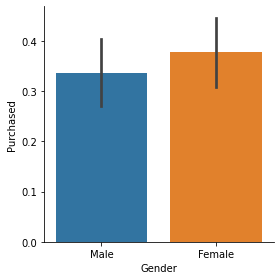

In [ ]:
g=sns.catplot(x='Gender',y='Purchased',data=df,kind='bar',height=4)

Purchased         0         1
Gender                       
Female     0.622549  0.377451
Male       0.663265  0.336735


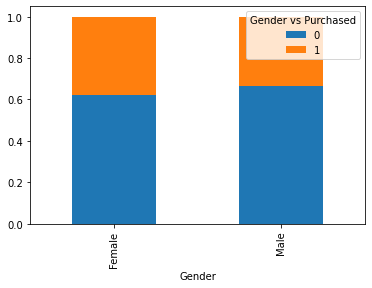

In [ ]:
M2=pd.crosstab(df.Gender,df.Purchased,normalize='index')
print(M2)
M2.plot.bar(figsize=(6,4),stacked=True)
plt.legend(title='Gender vs Purchased', loc='upper right')
plt.show()

(3, 3)


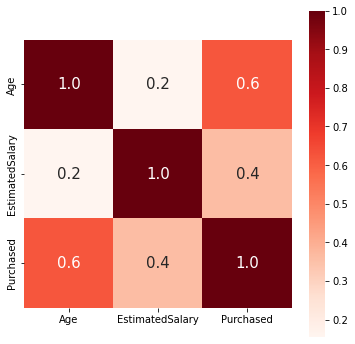

In [ ]:
corr=df.corr()
print(corr.shape)
plt.figure(figsize=(6,6))
sns.heatmap(corr,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size': 15},cmap='Reds')

In [ ]:
df.Purchased.value_counts()

0    257
1    143
Name: Purchased, dtype: int64

In [ ]:
df.Gender.value_counts()

Female    204
Male      196
Name: Gender, dtype: int64

In [ ]:
df.isnull().sum()

Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [ ]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [ ]:
#Get input variable/features into X and Outcome variable into Y
X=df.drop(['Gender','Purchased'],axis=1)
Y=df['Purchased']
X.head()

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000


In [ ]:
#Split the data into Train set and Test set
from sklearn.model_selection import train_test_split
#Shuffle and split the data into training and testing subsets
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

#Success
print("Training and testing data split is succesfull")

Training and testing data split is succesfull


In [ ]:
#Build the Model
from sklearn.linear_model import LogisticRegression
basemodel = LogisticRegression()
basemodel.fit(X_train,y_train)
print("Training accuracy:",basemodel.score(X_train,y_train)*100)

Training accuracy: 64.0625


In [ ]:
#Make predictions on test data
y_predict = basemodel.predict(X_test)
print("Testing accuracy: ", basemodel.score(X_test,y_test)*100)

Testing accuracy:  65.0


In [ ]:
#Normalize the data using MinMax Normalization or any other technique
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()


In [ ]:
X = df[['Age', 'EstimatedSalary']]
X.scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X.scaled,Y,test_size=0.2,random_state=42)
print("Training and testing split was succesfull")

Training and testing split was succesfull


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


In [ ]:
model = LogisticRegression()
model.fit(X_train,y_train)
y_predict = model.predict(X_test)
print("Training accuracy:",model.score(X_train,y_train)*100)
print("Training accuracy:",model.score(X_test,y_test)*100)

Training accuracy: 80.9375
Training accuracy: 87.5


In [ ]:
#Measure the performance of the model
#1.Measure the accuracy
#2.Measure to performance using Prediction, Recall, Fscore, Support etc.

from sklearn.metrics import accuracy_score
Acc=accuracy_score(y_test, y_predict)
print(Acc)

0.875


In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_predict)
print(cm)

[[51  1]
 [ 9 19]]


In [ ]:
from sklearn.metrics import precision_recall_fscore_support
prf=precision_recall_fscore_support(y_test, y_predict)
print('precision:',prf[0])
print('Recall:',prf[1])
print('fscore:',prf[2])
print('support:',prf[3])

precision: [0.85 0.95]
Recall: [0.98076923 0.67857143]
fscore: [0.91071429 0.79166667]
support: [52 28]
